# CS50p Final Project
### Business Analysis Made Easy
This project takes user input about a company and product lines, generates random sales data, and then creates a pdf report graphing the sales data

Modules to Import

In [26]:
import random
from datetime import date,timedelta,datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

Product Class definition and `get_product()` function

In [27]:
class Product:
    def __init__(self, name, sales, growth):
        self.name = name
        self.sales = sales
        self.growth = growth

def get_product():
    product = {}
    # Product Name
    while True:
        product_name = input("Product Name: ")
        if product_name.isalnum():
            break
    # Product Sales
    while True:
        try:
            product_sales = float(input("Estimated daily sales: "))
            product['sales'] = product_sales
            break
        except ValueError:
            pass
            print("Sales must be numerical value")
    # Product Sales Growth
    while True:
        try:
            product_growth = float(input("Estimated growth rate(XX%): ").strip().strip("%"))
            break
        except ValueError:
            pass
            print("Growth must be numerical value")
    return Product(product_name,product_sales,product_growth)

Business Class definition and `get_business()` function

In [28]:
class Business:
    def __init__(self,name,products):
        self.name = name
        self.products = products

def get_business():
    global get_product
    products = {}
    while True:
        try:
            name = input("Business Name: ").strip()
            words = name.split()
            counter = 0
            for word in words:
                if word.isalnum():
                    counter += 1
            if counter == len(words):
                    name = " ".join(words)
                    break
            else:
                print("Name must be AlphaNumeric")
        except ValueError:
            pass
    while True:
        try:
            _date = input("End Date(YYYY-MM-DD): ")
            if date.fromisoformat(_date):
                end_date = date.fromisoformat(_date)
                if end_date > date.today():
                    break
                else:
                    print("Date must come after today")
        except ValueError:
            pass
    x = "y"
    while x!="n":
        product = get_product()
        products[product.name] = {'sales':product.sales,'growth':product.growth}
        x = input("Any more products(y/n)?").lower()

    return Business(name, products), end_date


`generate_sales()` function

In [29]:
def generate_sales(business, product, sales_period):
    daily_sales = {}
    sales_base = business.products[product]['sales']
    daily_growth_rate = ((business.products[product]['growth']/365)/100)
    for i, date in enumerate(sales_period):
        generate_sales = random.uniform(.9*sales_base,1.1*sales_base) * (1 + (daily_growth_rate*i))
        daily_sales[date] = generate_sales
        business.products[product]['daily_sales'] = daily_sales

`create_report()` function

In [30]:
def create_report(business, sales_period):
    fig = plt.figure()
    for i,product in enumerate(business.products):
        generate_sales(business, product, sales_period)
        dates = []
        sales = business.products[product]['daily_sales'].values()
        for date in business.products[product]['daily_sales'].keys():
            dates.append(date)
        fig.add_subplot(len(business.products),1,(i+1)).plot(dates,sales)
        plt.ylabel(f'{product}')
        if i == 0:
            plt.title(f'{business.name} Daily Sales')
    fig.autofmt_xdate()
    plt.savefig(f'{business.name}_Sales_Report.pdf')

In [34]:
business, end_date = get_business()

Business Name: Spacely Sprockets
End Date(YYYY-MM-DD): 2024-01-01
Product Name: Cogs
Estimated daily sales: 1000
Estimated growth rate(XX%): 20
Any more products(y/n)?y
Product Name: Widgets
Estimated daily sales: 2000
Estimated growth rate(XX%): 30
Any more products(y/n)?n


In [35]:
sales_period = pd.date_range(start = datetime.today(),end=end_date)

<Figure size 640x480 with 0 Axes>

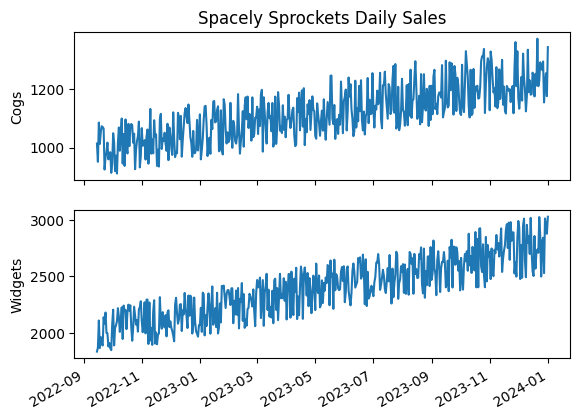

In [36]:
fig = plt.figure()
create_report(business,sales_period)